In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

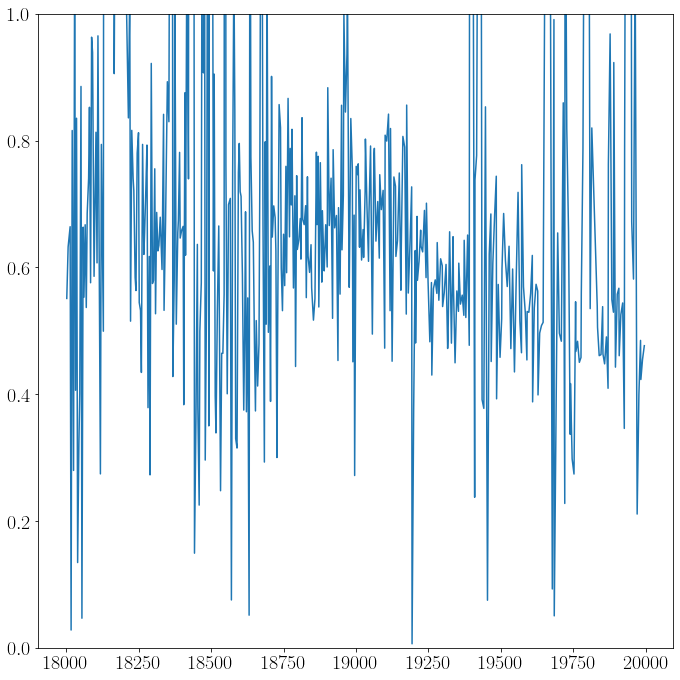

In [15]:
red_edge, blue_edge = 20000, 18000
import numpy as np
import matplotlib.pyplot as plt
line_region = np.where((Spec1.wv_rf < red_edge) & (Spec1.wv_rf > blue_edge))[0]

plt.figure(figsize=(10, 10))
plt.plot(Spec1.wv_rf[line_region], Spec1.fl[line_region])
plt.ylim(0, 1)
plt.tight_layout()

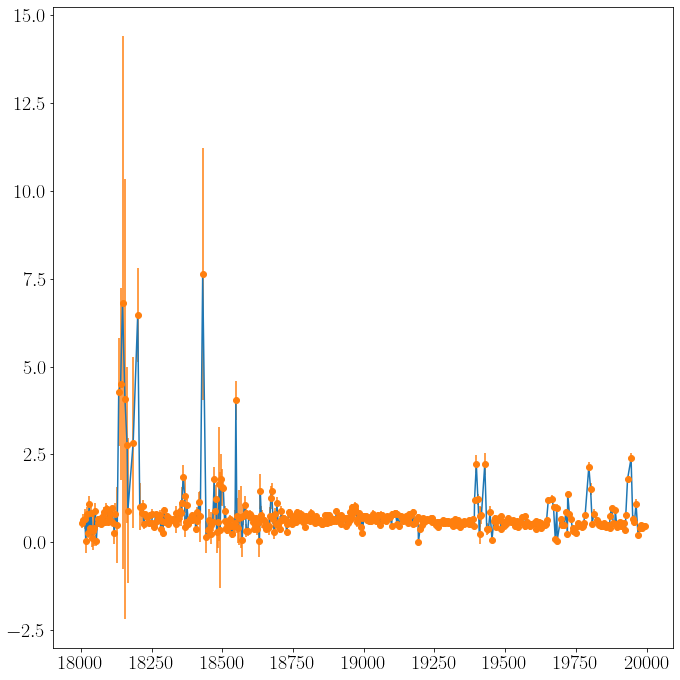

In [8]:
Spec1.plot_line_region(18000, 20000)

## Ca II IRT

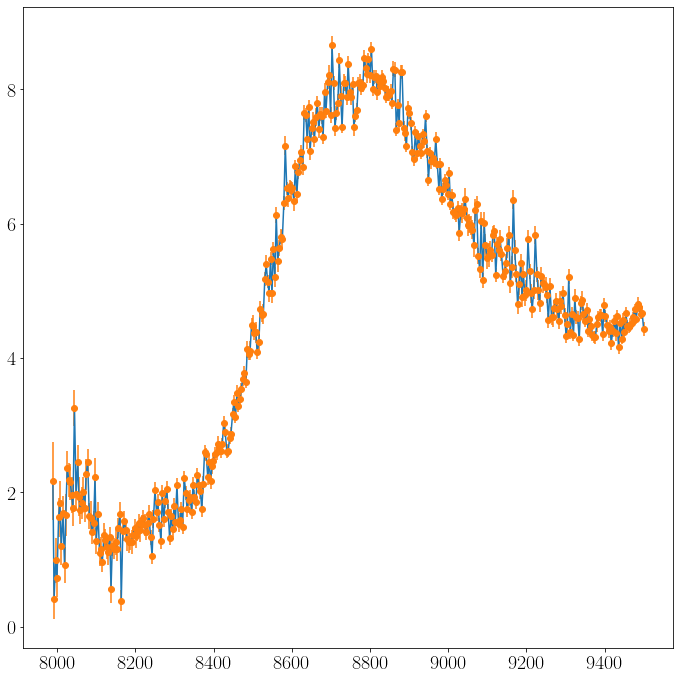

In [20]:
Spec1.plot_line_region(7400, 9500)

## He I 10830

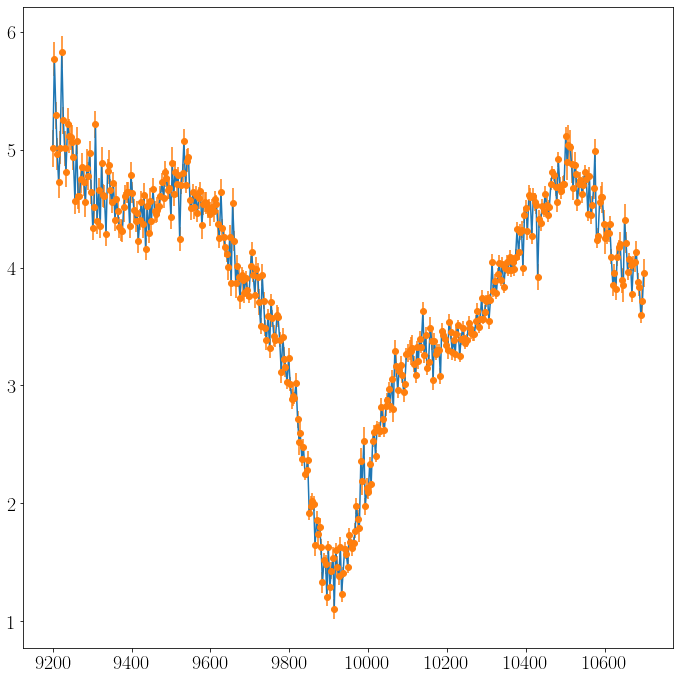

In [16]:
Spec1.plot_line_region(9200, 10700)

In [17]:
Spec1.add_line('HeI_10830', 9500, 10500, lines=[10830])

267 points within 9500.00 and 10500.00 angstroms.


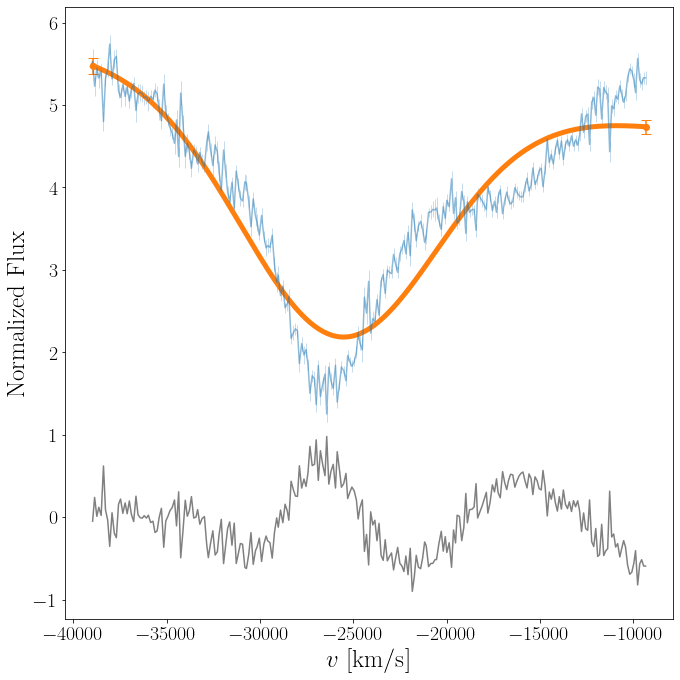

LS estimation:
Velocity pvf: -25776 km/s


In [18]:
Spec1.line['HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000))

## Mg II 10927

In [19]:
Spec1.add_line('MgII_10927', 9500, 10200, lines=[10927])

187 points within 9500.00 and 10200.00 angstroms.


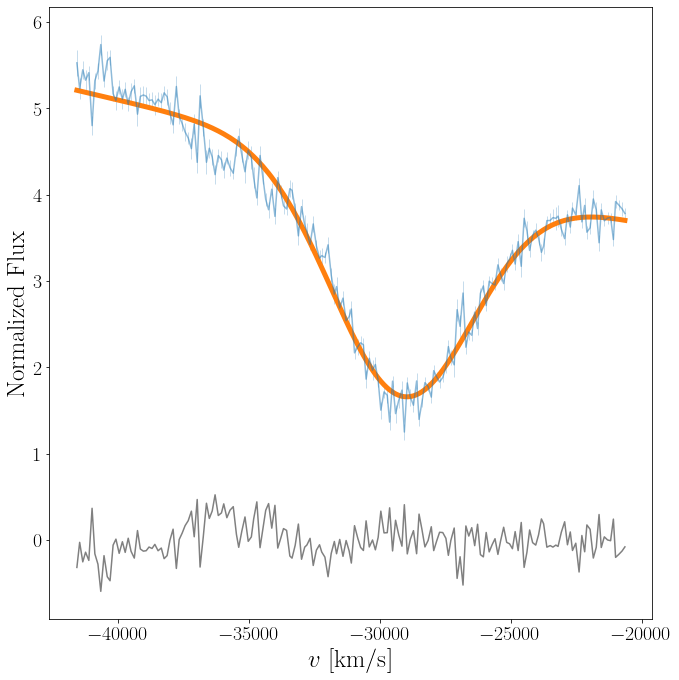

LS estimation:
Velocity pvf: -29170 km/s


In [20]:
Spec1.line['MgII_10927'].LS_estimator(guess=(1, 1, -25000, 15, -2000))